In [2]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.float_format',lambda x : '%.5f' % x)
pd.set_option('display.width', 500)    #设置整体宽度
from mtools import plot_fig
import matplotlib.pyplot as plt
import seaborn as sns
from mtools import monkey as mk

os.chdir('/data/wjk/Workspace/Datasets/IGR')
# IGR_DIRS = ['IGR_cjy', 'IGR230307', 'IGR230312', 'IGR230415']
IGR_DIR = 'IGR230425'

In [3]:
all_imu_data = pd.read_hdf(f'Output/all_imu_data_{IGR_DIR}.h5', 'all_imu')
phones = all_imu_data['phone'].unique()
trips = all_imu_data['trip'].unique()
all_imu_data['AccU'] = all_imu_data['AccU'] - 9.8
all_imu_data.columns

Index(['timestamp', 'elapsedRealtimeNanos', 'AccX', 'AccY', 'AccZ', 'Source', 'AccE', 'AccN', 'AccU', 'GysX', 'GysY', 'GysZ', 'GysE', 'GysN', 'GysU', 'MagX', 'MagY', 'MagZ', 'yawDeg', 'rollDeg', 'pitchDeg', 'phone', 'trip'], dtype='object')

In [19]:
trip_id = 4
phones = all_imu_data['phone'].unique()
tmp = all_imu_data[['phone', 'trip']]
tmp.drop_duplicates(inplace=True)
print(tmp)
# phones = phones[1:3]
# phones = ['Mate40E']
phones = ['Nova9pro']
pre_duration = 0
duration = 40
sub_dfs = [all_imu_data['timestamp'][(all_imu_data['trip']==trips[trip_id])&(all_imu_data['phone']==phone)].to_frame() for phone in phones]
print(len(sub_dfs))
start_timestamps = [sub_df.iloc[0] for sub_df in sub_dfs]
start_timestamp = np.max(start_timestamps) + pre_duration*100
start_timestamp_inds = [np.where(sub_df==start_timestamp)[0][0] for sub_df in sub_dfs]
print(start_timestamp_inds)
sub_dfs = [all_imu_data[(all_imu_data['trip']==trips[trip_id])&(all_imu_data['phone']==phone)].iloc[ind:ind+duration*100] for phone,ind in zip(phones, start_timestamp_inds)]
sub_df = pd.concat(sub_dfs)

/tmp/ipykernel_17306/2473160489.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.drop_duplicates(inplace=True)


            phone               trip
0         Mate40E  23_04_25_19_11_29
51998     Mate40E  23_04_25_19_21_31
104996    Mate40E  23_04_25_19_31_05
157094    Mate40E  23_04_25_19_41_48
209192   Nova9pro  23_04_26_11_22_58
261190   Nova9pro  23_04_26_11_38_34
313388   Nova9pro  23_04_26_11_48_20
365486   Nova9pro  23_04_26_11_57_51
417584  Oneplus9r  23_04_25_16_49_30
469682  Oneplus9r  23_04_25_17_00_21
521780  Oneplus9r  23_04_25_17_10_12
573878  Oneplus9r  23_04_25_17_20_32
1
[0]


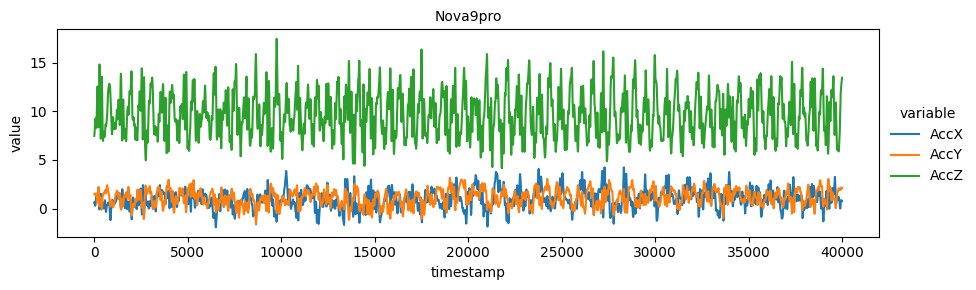

In [20]:
melt_sub_df = pd.melt(sub_df[['timestamp', 'AccX', 'AccY', 'AccZ', "phone"]], id_vars=['timestamp', 'phone'], value_vars=['AccX', 'AccY', 'AccZ'])
melt_sub_df['timestamp'] = melt_sub_df['timestamp']-np.min(melt_sub_df['timestamp'].values)

g = sns.FacetGrid(melt_sub_df, hue='variable', col="phone", despine=False, aspect=3) # ,  col_wrap=2
g.map(sns.lineplot, "timestamp", "value")
g.set_titles("{col_name}")
g.add_legend()
plt.show()
# g.savefig('Figures/err_scatter_byphone_new.png', dpi=150, pad_inches=0.2)

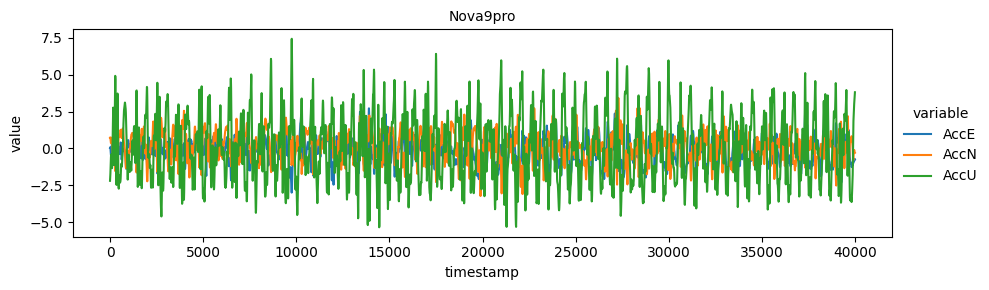

In [21]:
melt_sub_df = pd.melt(sub_df[['timestamp', 'AccE', 'AccN', 'AccU', "phone"]], id_vars=['timestamp', 'phone'], value_vars=['AccE', 'AccN', 'AccU'])
melt_sub_df['timestamp'] = melt_sub_df['timestamp']-np.min(melt_sub_df['timestamp'].values)
g = sns.FacetGrid(melt_sub_df, hue='variable', col="phone", despine=False, aspect=3) # ,  col_wrap=2
g.map(sns.lineplot, "timestamp", "value")
g.set_titles("{col_name}")
g.add_legend()
plt.show()

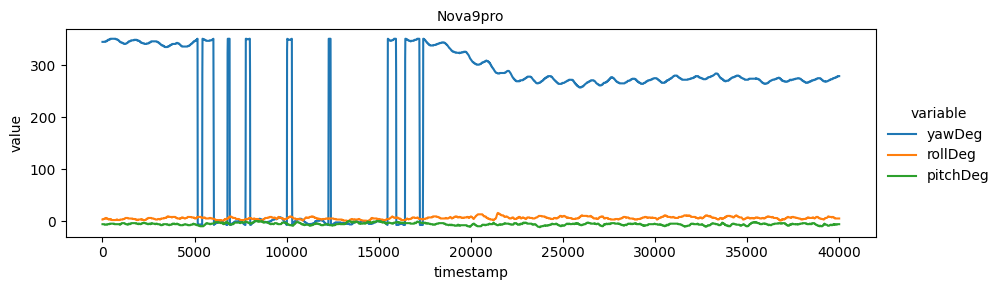

In [24]:
melt_sub_df = pd.melt(sub_df[['timestamp', 'yawDeg', 'rollDeg', 'pitchDeg', "phone"]], id_vars=['timestamp', 'phone'], value_vars=['yawDeg', 'rollDeg', 'pitchDeg'])
melt_sub_df['timestamp'] = melt_sub_df['timestamp']-np.min(melt_sub_df['timestamp'].values)

g = sns.FacetGrid(melt_sub_df, hue='variable', col="phone", despine=False, aspect=3) # ,  col_wrap=2
g.map(sns.lineplot, "timestamp", "value")
g.set_titles("{col_name}")
g.add_legend()
plt.show()
# g.savefig('Figures/err_scatter_byphone_new.png', dpi=150, pad_inches=0.2)

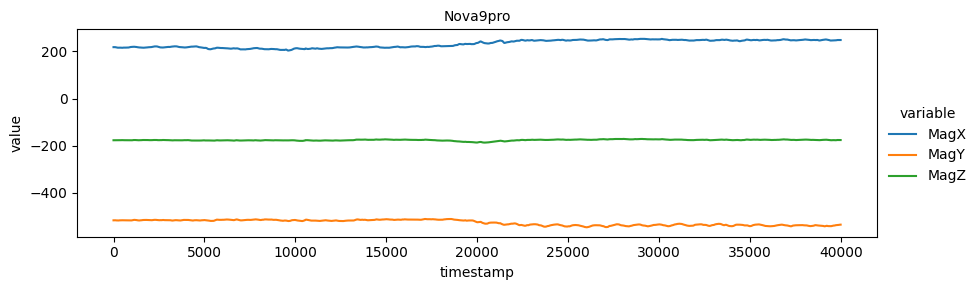

In [23]:
melt_sub_df = pd.melt(sub_df[['timestamp', 'MagX', 'MagY', 'MagZ', "phone"]], id_vars=['timestamp', 'phone'], value_vars=['MagX', 'MagY', 'MagZ'])
melt_sub_df['timestamp'] = melt_sub_df['timestamp']-np.min(melt_sub_df['timestamp'].values)

g = sns.FacetGrid(melt_sub_df, hue='variable', col="phone", despine=False, aspect=3) # ,  col_wrap=2
g.map(sns.lineplot, "timestamp", "value")
g.set_titles("{col_name}")
g.add_legend()
plt.show()
# g.savefig('Figures/err_scatter_byphone_new.png', dpi=150, pad_inches=0.2)

In [5]:
# Normalization
for IGR_DIR in IGR_DIRS:
    all_imu_data = pd.read_hdf(f'Output/all_imu_data_{IGR_DIR}.h5', 'all_imu')
    phones = all_imu_data['phone'].unique()
    trips = all_imu_data['trip'].unique()
    all_imu_data['AccU'] = all_imu_data['AccU'] - 9.8
    acc_values = all_imu_data[['timestamp', 'AccE', 'AccN', 'AccU']].melt(id_vars=['timestamp'], value_vars=['AccE', 'AccN', 'AccU'])['value']
    gyr_values = all_imu_data[['timestamp', 'GysE', 'GysN', 'GysU']].melt(id_vars=['timestamp'], value_vars=['GysE', 'GysN', 'GysU'])['value']
    acc_values = np.abs(acc_values)
    gyr_values = np.abs(gyr_values)
    acc_des = acc_values.astype('float64').describe(percentiles=[.01, 0.1, 0.2, .25, .75, .8, 0.9, 0.99]).to_frame().T
    gyr_des = gyr_values.astype('float64').describe(percentiles=[.01, 0.1, 0.2, .25, .75, .8, 0.9, 0.99]).to_frame().T
    mk.magic_append([acc_des, gyr_des])
acc_des_list, gyr_des_list = mk.magic_get()

In [ ]:
acc_des = pd.concat(acc_des_list)
gyr_des = pd.concat(gyr_des_list)
print(acc_des)
print(gyr_des)
print(acc_des/gyr_des)

pd.concat((acc_des, gyr_des, acc_des/gyr_des)).to_csv('Output/acc_gyr_des.csv', float_format='%.2f')

              count    mean     std     min      1%     10%     20%     25%     50%     75%     80%     90%     99%      max
value 2285604.00000 0.68313 0.52671 0.00000 0.01062 0.10613 0.21337 0.26778 0.56428 0.98404 1.10592 1.43979 2.22519  4.86103
value 1768122.00000 1.32696 1.04526 0.00000 0.02038 0.20418 0.40839 0.51173 1.07079 1.90073 2.15465 2.86765 4.38663  9.68904
value 2062416.00000 1.32259 1.13838 0.00000 0.01926 0.19337 0.38581 0.48210 0.99112 1.85422 2.16092 2.99375 4.95650 10.24659
value 1185855.00000 1.01720 0.96732 0.00000 0.01330 0.13252 0.26688 0.33503 0.71854 1.39392 1.63034 2.35509 4.30880 14.75377
              count    mean     std     min      1%     10%     20%     25%     50%     75%     80%     90%     99%     max
value 2285604.00000 0.15861 0.15137 0.00000 0.00213 0.02145 0.04340 0.05469 0.11838 0.21313 0.24267 0.33954 0.73618 1.85722
value 1768122.00000 0.27039 0.21441 0.00000 0.00431 0.04347 0.08665 0.10838 0.22185 0.37669 0.42368 0.56532 0.95877 1.84387
val